# Information

## Developer
- Name: André Miguel Faria da Silva
- N_mec: 201906559
- Site: <https://asilva.luxcorp.pt>
- Github: <https://github.com/user/mastersilvapt>
- Kaggle: <https://www.kaggle.com/mastersilvapt>

## Project
This project was divided in 2 parts.
### 1st Part
The 1st part was done in R. See [Report](../R/reportPart1.pdf).

Our objective was to start learning R while developing basic skills.

After reading the data we calculated every column's NAN percentage and removed the column if above 60%.

After that, we removed all records that have a NAN value and train the model.

In the model, we only tested with depth 2,3 e nrounds 50, 100.

### 2nd Part
The 2nd part is this one.

This part is focus on the project not in the language.

# Libraries and Global Defenitions

In [ ]:
%pip install pandas scikit-learn xgboost numpy matplotlib seaborn

In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.calibration import LabelEncoder

import xgboost as xgb
from xgboost import XGBClassifier

from matplotlib import pyplot as plt # PLOTS
import seaborn as sns # PLOT

In [15]:
def get_available_name(path, name, ext):
    i = 100
    while os.path.exists(f'{path}/{name}{i}.{ext}'):
        i+= 1
    return f'{path}/{name}{i}.{ext}'

## Read data from csv to DataFrame

In [2]:
def load_train_csv(file):
    return pd.read_csv(file, dtype= {
    'id': np.int64,
    'income': np.float64,
    'name_email_similarity': np.float64,
    'prev_address_months_count': np.float64,
    'current_address_months_count': np.float64,
    'customer_age': np.float64,
    'days_since_request': np.float64,
    'intended_balcon_amount': np.float64,
    'payment_type': object,
    'zip_count_4w': np.float64,
    'velocity_6h': np.float64,
    'velocity_24h': np.float64,
    'velocity_4w': np.float64,
    'bank_branch_count_8w': np.float64,
    'date_of_birth_distinct_emails_4w': np.float64,
    'employment_status': object,
    'credit_risk_score': np.float64,
    'email_is_free': np.float64, # binary
    'housing_status': object,
    'phone_home_valid': np.float64, # binary
    'phone_mobile_valid': np.float64, # binary
    'bank_months_count': np.float64,
    'has_other_cards': np.float64, # binary
    'proposed_credit_limit': np.float64,
    'foreign_request': np.float64, # binary
    'source': object,
    'session_length_in_minutes': np.float64,
    'device_os': object,
    'keep_alive_session': np.float64, # binary
    'device_distinct_emails_8w': np.float64,
    'device_fraud_count': np.float64,
    'month': np.float64,
    'is_fraud': np.float64, # binary
})

df_train_start = load_train_csv('../datasets/train.csv')

In [3]:
def load_test_csv(file):
    return pd.read_csv(file, dtype= {
    'id': np.int64,
    'income': np.float64,
    'name_email_similarity': np.float64,
    'prev_address_months_count': np.float64,
    'current_address_months_count': np.float64,
    'customer_age': np.float64,
    'days_since_request': np.float64,
    'intended_balcon_amount': np.float64,
    'payment_type': object,
    'zip_count_4w': np.float64,
    'velocity_6h': np.float64,
    'velocity_24h': np.float64,
    'velocity_4w': np.float64,
    'bank_branch_count_8w': np.float64,
    'date_of_birth_distinct_emails_4w': np.float64,
    'employment_status': object,
    'credit_risk_score': np.float64,
    'email_is_free': np.float64, # binary
    'housing_status': object,
    'phone_home_valid': np.float64, # binary
    'phone_mobile_valid': np.float64, # binary
    'bank_months_count': np.float64,
    'has_other_cards': np.float64, # binary
    'proposed_credit_limit': np.float64,
    'foreign_request': np.float64, # binary
    'source': object,
    'session_length_in_minutes': np.float64,
    'device_os': object,
    'keep_alive_session': np.float64, # binary
    'device_distinct_emails_8w': np.float64,
    'device_fraud_count': np.float64,
    'month': np.float64
})

df_test = load_test_csv('../datasets/test.csv')

# Data Understanding

## See all distinct options of each column

In [23]:
def all_unique(df):
    return [(i, df[i].unique()) for i in df.columns]

for i,j in all_unique(df_train_start):
    print(i, j)

id [   1    2    3 ... 7942 7943 7944]
income [0.6 0.3 0.8 0.7 0.9 0.1 0.4 0.5 0.2]
name_email_similarity [0.15868895 0.62182923 0.1206392  ... 0.33928413 0.99878297 0.99948717]
prev_address_months_count [ -1.  79.  20.  10.  57.  25.  37.  92.  88.  54.  30.  50.  27.  42.
  26.  74.  40.  31.  32.  29.  49.  38.  56.  28.  89.  84.  52. 154.
  12.  53.  24. 285.  83.  11.  23. 115.  48. 173.  91.  35.   8.  44.
  22.  47.  61.  41.  59.  34.  14.  21. 110. 207.  96.  58.  18.  94.
  62. 171. 103. 167. 104.  46.  63.   9. 218. 226. 177.  55. 139. 198.
  13.  33.  98.  69. 162. 182.  19.  93.  51. 113. 216. 303.  80. 108.
 178.  87.  90.  86. 326. 148. 176. 112. 224.  17. 180.  45. 286.  81.
 329. 323.  60. 105.  82.  68. 276. 186.  95.  97. 169. 116.  43. 146.
 336. 132. 151. 318. 244. 210. 101. 284. 301.   6. 117. 118. 316. 100.
 297. 141.  99. 351. 199. 214. 294. 324.  36. 107. 189. 219. 230. 204.
 147. 142. 322. 321. 114. 330.  76.  70. 268. 293. 309. 304. 106. 120.
 149. 220. 340.

## Dealing With NAN

Following the datasheet we replaced -1 for NAN. After some analysis we found 3 more columns in which -1 implies NAN; However that was not noted in the datasheet.

In [4]:
def replaceMissingToNAN(df):
    df = df.copy()
    df['prev_address_months_count'] = df['prev_address_months_count'].replace(-1, np.nan)
    df['customer_age'] = df['customer_age'].replace(-1, np.nan) # Missing information, description does not specify that -1 is NAN
    df['current_address_months_count'] = df['current_address_months_count'].replace(-1, np.nan)
    df['bank_months_count'] = df['bank_months_count'].replace(-1, np.nan)
    df['session_length_in_minutes'] = df['session_length_in_minutes'].replace(-1, np.nan) # Missing information, description does not specify that -1 is NAN
    df['device_distinct_emails_8w'] = df['device_distinct_emails_8w'].replace(-1, np.nan) # Missing information, description does not specify that -1 is NAN
    return df

After a small analysis of the data we determine that t

In [5]:
df_train = replaceMissingToNAN(df_train_start)

df_train.drop(axis=1, labels='id', inplace=True)
df_train.drop(axis=1, labels='prev_address_months_count', inplace=True)
df_train.drop(axis=1, labels='device_fraud_count', inplace=True)
df_train.reset_index(inplace=True, drop=True)

After analyzing the dataset and testing it with the removal of all NAN columns with a percentage of missing values above 75% and 50% respectively followed by droping all records with NAN values that this method removed a lot of data and added difficulties on evaluation the model with the Test dataset.

So we chose not to remove NAN and Impute generated values, the solution was based on a discussion with a MDS student and, we concluded that we would follow this [Article](https://academic.oup.com/bioinformatics/article/28/1/112/219101).

In [6]:
# Article: https://academic.oup.com/bioinformatics/article/28/1/112/219101

cols = [i for i in zip(df_train.columns, df_train.dtypes) if i[0] in df_train.columns[df_train.isna().any()]]

categorical = [i[0] for i in cols if i[1] == object]
numerical = [i[0] for i in cols if i[1] != object]

df_train[categorical] = df_train[categorical].apply(lambda series:
                                                    pd.Series(
                                                        LabelEncoder().fit_transform(series[series.notnull()]),
                                                        index=series[series.notnull()].index
                                                        )
                                                    )

imp_num = IterativeImputer(estimator=RandomForestRegressor(), initial_strategy='mean', max_iter=20, random_state=42)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='mean', max_iter=20, random_state=42)

df_train[numerical] = imp_num.fit_transform(df_train[numerical])
df_train[categorical] = imp_cat.fit_transform(df_train[categorical])

print()
print('categorical', categorical)
print('numerical', numerical)

/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



categorical ['employment_status', 'source']
numerical ['current_address_months_count', 'customer_age', 'bank_months_count', 'has_other_cards', 'session_length_in_minutes', 'device_distinct_emails_8w']


## Variables distribution

This is a way to visually inspect the distribution of each feature when Non Fraud vs. Fraud

income float64 Not Fraud / Fraud


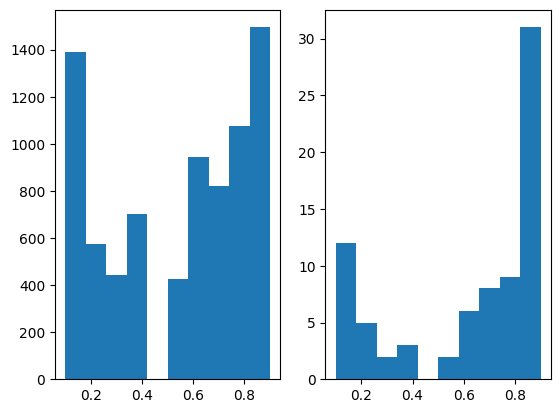

name_email_similarity float64 Not Fraud / Fraud


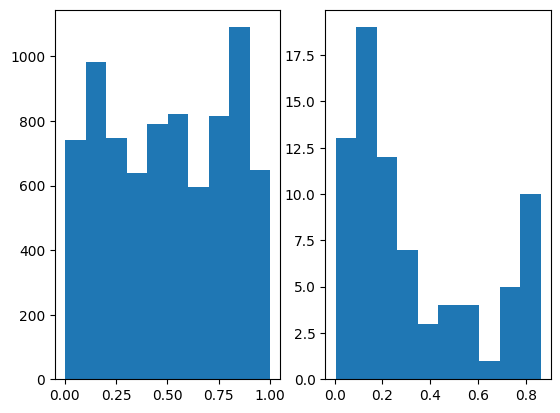

current_address_months_count float64 Not Fraud / Fraud


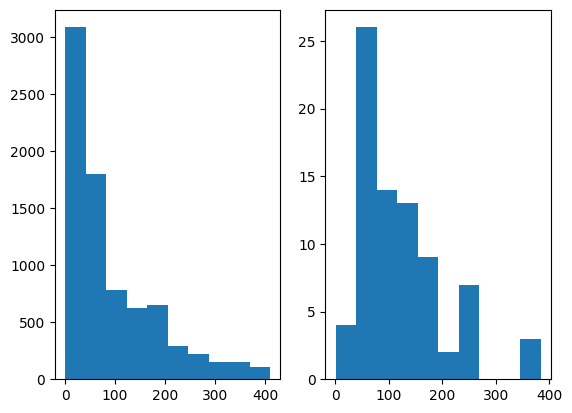

customer_age float64 Not Fraud / Fraud


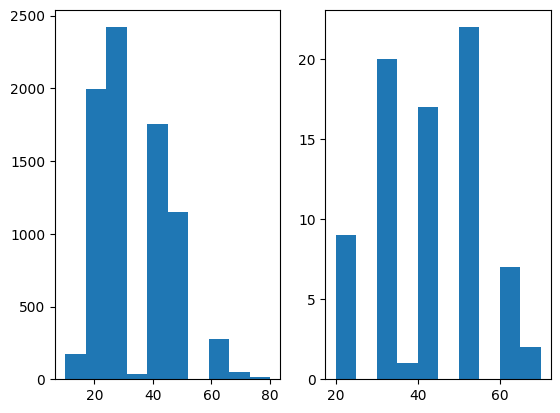

days_since_request float64 Not Fraud / Fraud


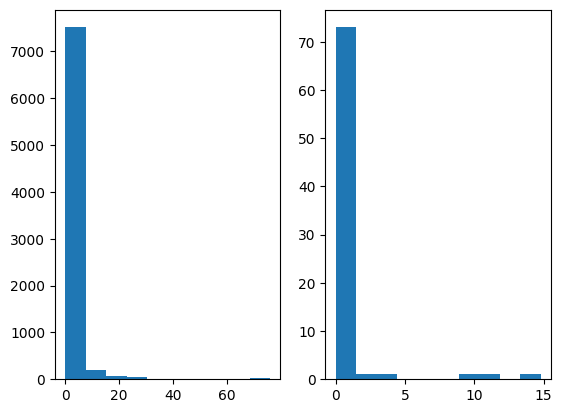

intended_balcon_amount float64 Not Fraud / Fraud


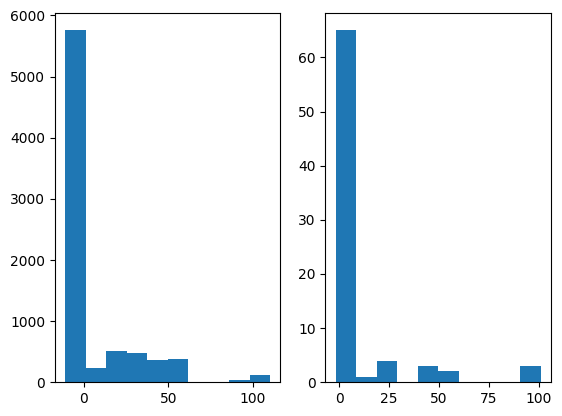

payment_type object Not Fraud / Fraud


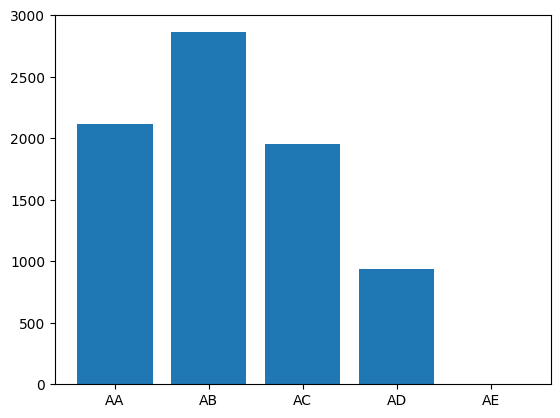

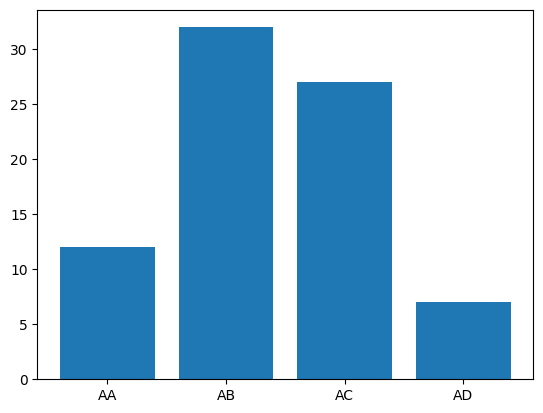

zip_count_4w float64 Not Fraud / Fraud


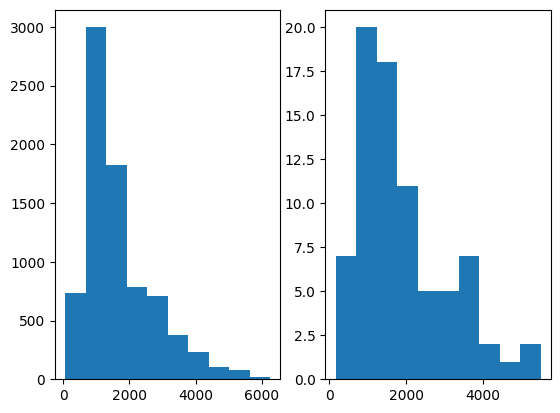

velocity_6h float64 Not Fraud / Fraud


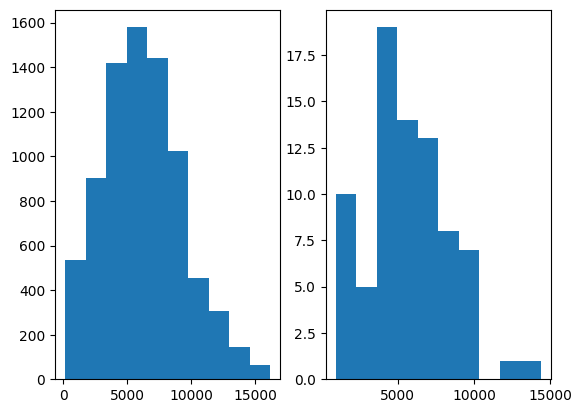

velocity_24h float64 Not Fraud / Fraud


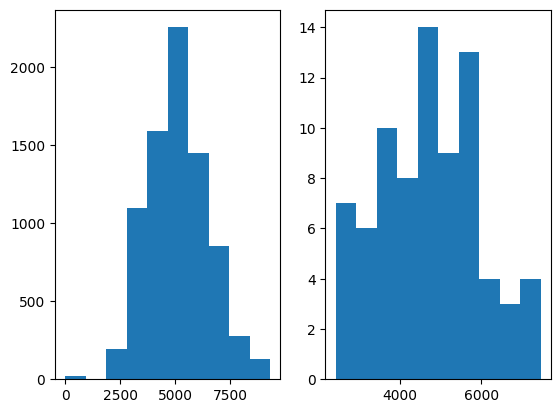

velocity_4w float64 Not Fraud / Fraud


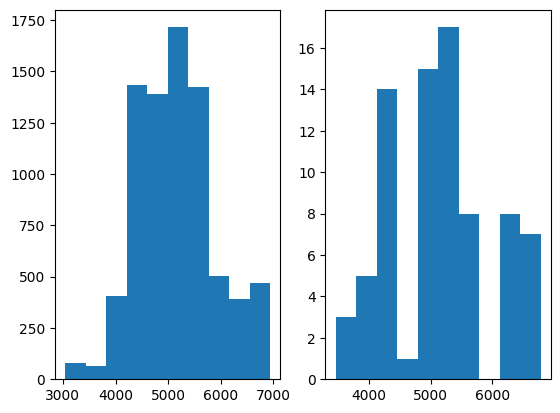

bank_branch_count_8w float64 Not Fraud / Fraud


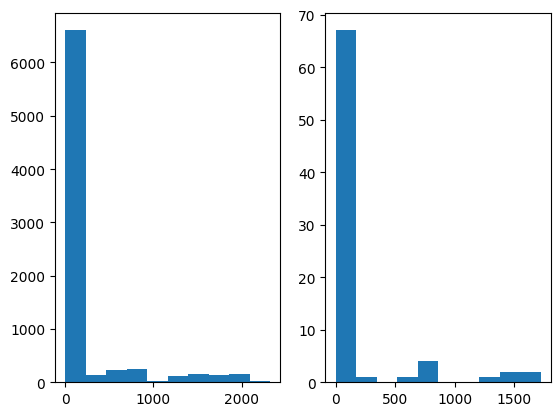

date_of_birth_distinct_emails_4w float64 Not Fraud / Fraud


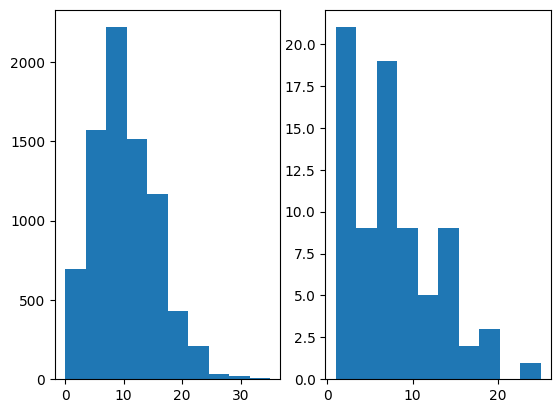

employment_status float64 Not Fraud / Fraud


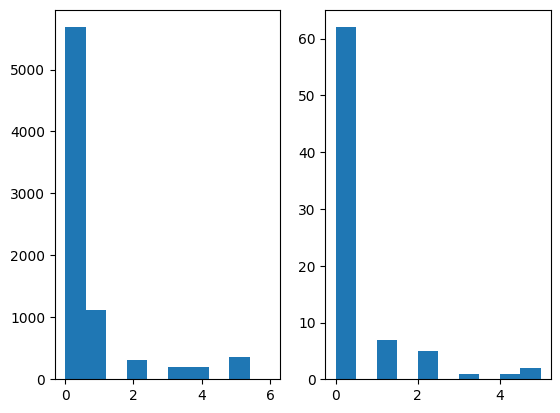

credit_risk_score float64 Not Fraud / Fraud


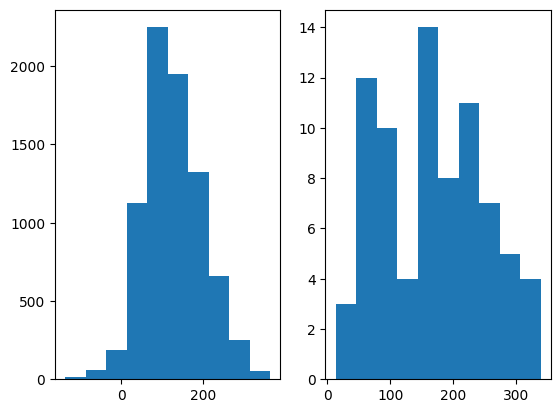

email_is_free float64 Not Fraud / Fraud


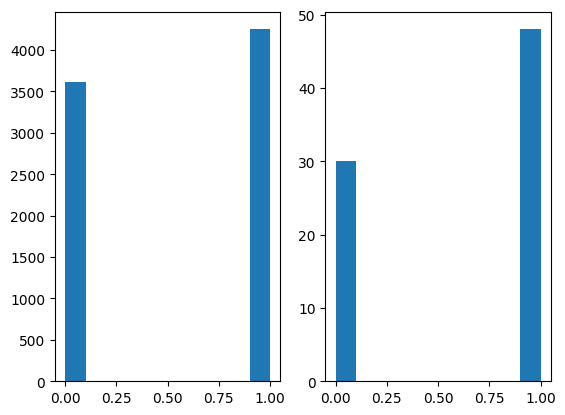

housing_status object Not Fraud / Fraud


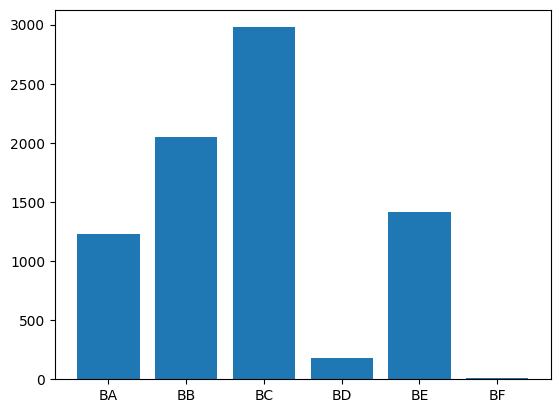

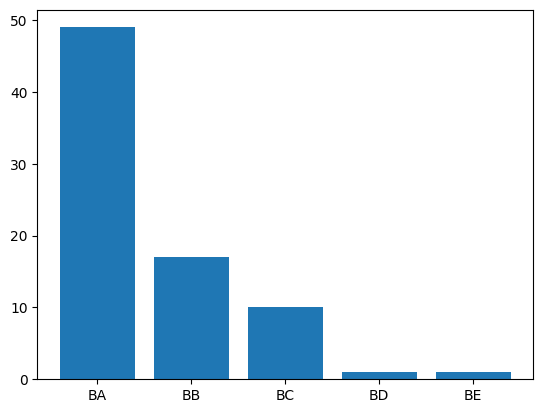

phone_home_valid float64 Not Fraud / Fraud


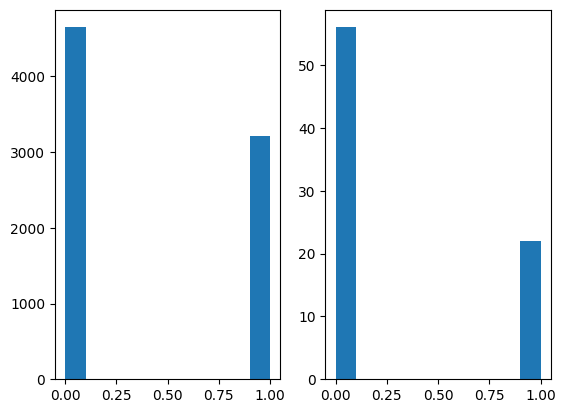

phone_mobile_valid float64 Not Fraud / Fraud


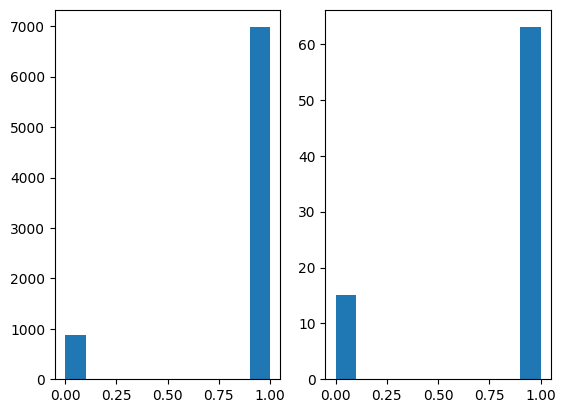

bank_months_count float64 Not Fraud / Fraud


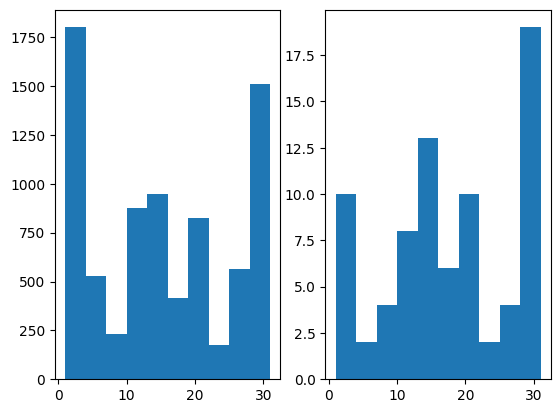

has_other_cards float64 Not Fraud / Fraud


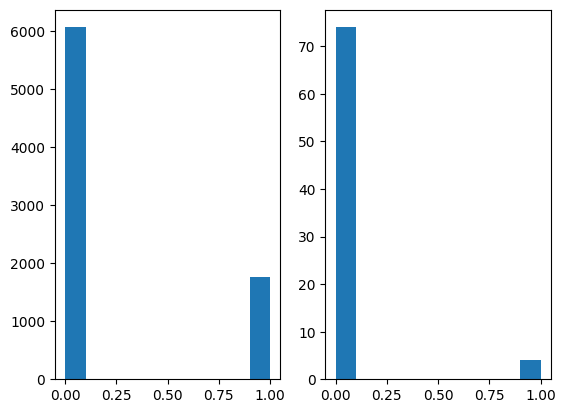

proposed_credit_limit float64 Not Fraud / Fraud


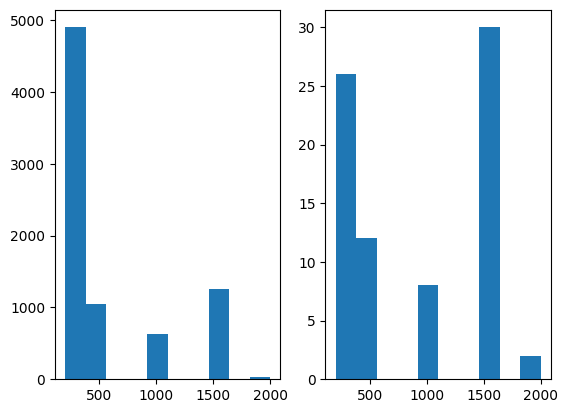

foreign_request float64 Not Fraud / Fraud


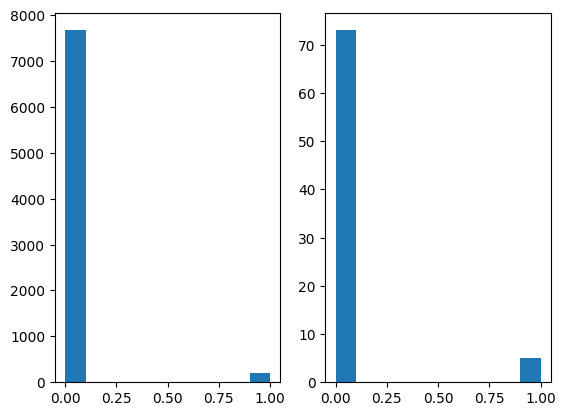

source float64 Not Fraud / Fraud


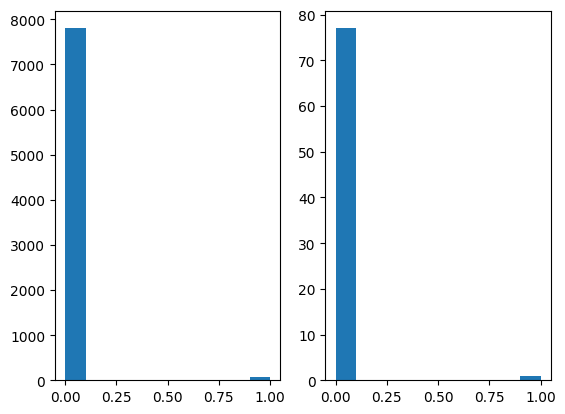

session_length_in_minutes float64 Not Fraud / Fraud


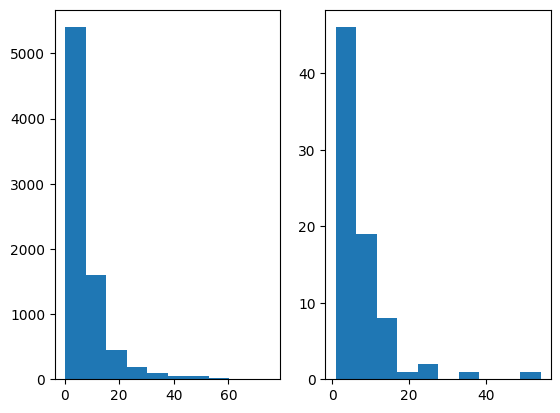

device_os object Not Fraud / Fraud


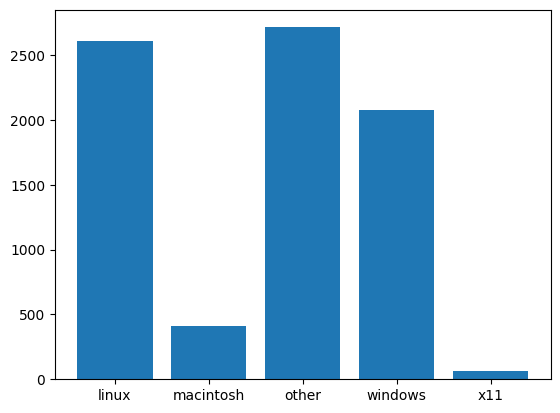

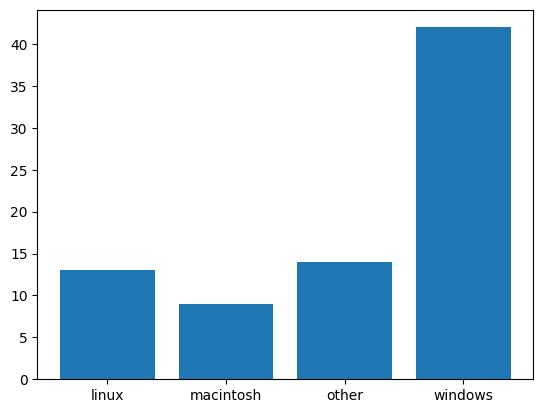

keep_alive_session float64 Not Fraud / Fraud


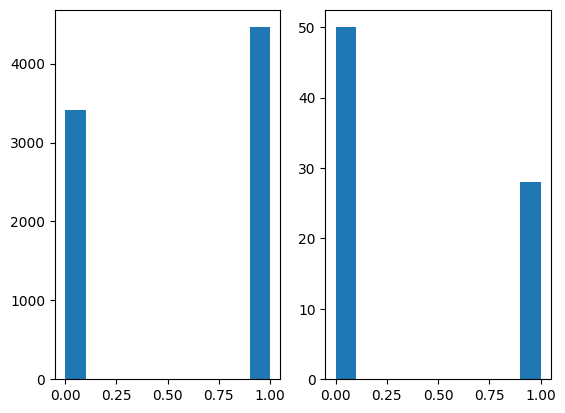

device_distinct_emails_8w float64 Not Fraud / Fraud


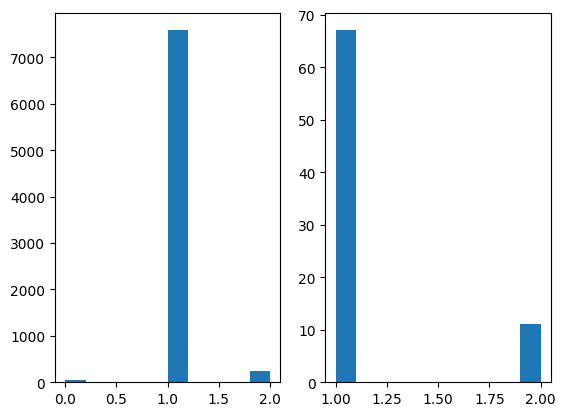

month float64 Not Fraud / Fraud


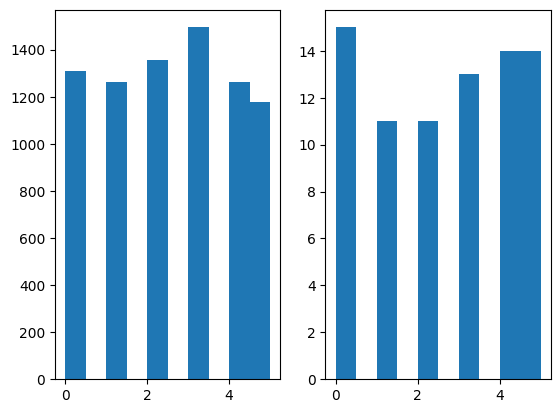

In [77]:
def plotDistributions(df):
    l = list(zip(df.columns, df.dtypes))
    for f in l[:len(l)-1:]:
        print(f[0], f[1], 'Not Fraud / Fraud')
        not_fraud = df[df['is_fraud'] == 0][f[0]]
        fraud = df[df['is_fraud'] == 1][f[0]]
        if f[1] == object:
            nf = np.unique(not_fraud, return_counts=True)
            plt.bar(nf[0], nf[1])
            plt.savefig(get_available_name('../plots', f'default_dist_bar0_{f[0]}', 'png'))
            plt.show()
            nf = np.unique(fraud, return_counts=True)
            plt.bar(nf[0], nf[1])
            plt.savefig(get_available_name('../plots', f'default_dist_bar1_{f[0]}', 'png'))
            plt.show()
        else:
            _, axes = plt.subplots(1, 2)
            axes[0].hist(not_fraud)
            axes[1].hist(fraud)
            plt.savefig(get_available_name('../plots', f'default_dist_hist_{f[0]}', 'png'))
            plt.show()

plotDistributions(df_train)

### Conclusions

#### income
Follows a multimodal distribution.
We can see a dent in the mid. we can conclude that or the incoming is small or high no middle grounds.

On fraud we can see a higher income

#### name_email_similarity
Follows a uniform distribution when is not fraud.
We cannot say the same on non fraud.

Exists less similarly when fraud, this could imply discardable mails

#### current_address_months_count
Follows an exponential distribution, similar in structure.

We can see a pick between 100 and 200 when comparing frauds to non-frauds.

Also, frauds have higher values


#### customer_age
Very similar.

More frauds in cases between 30 and 50 years old

#### days_since_request

Very similar shape. Could not extract any information.

#### intended_balcon_amount

Very similar shape.

We can observe a slite higher request amount

#### payment_type

We can see similarities in classes AB, AA, and AD. 

AE, having almost no cases, and thus being unrelyable, when it shows up its classified as not fraud.

We can see AB dominating both fraud and non-fraud.

#### zip_count_4w

The overall shape is similar.
There are no frauds in zones with zipcodes above 5000.

#### velocity_6h

Similar between fraud and non-fraud.

#### velocity_24h

Follows a normal distribution in non-fraud cases.

We can see less velocity in appliications when fraud

#### velocity_4w

Follows a normal distribution in non-fraud cases.

No aparent distribution on fraud; However we can see a higher number of applications

#### bank_branch_count_8w
Very similar

#### date_of_birth_distinct_emails_4w

Normal distribution, which can indicate veracity. In fraud, we see a dent in the number of emails per day.

#### employment_status

Very similar

#### credit_risk_score

Follows a normal distribution when non-fraud.

There are higher scores for frauds.

#### email_is_free

Could not find any information

#### housing_status

BC is more common in non-frauds
BA is more common in frauds

#### phone_home_valid

Could not find any information

#### bank_months_count
Similar

#### has_other_cards
Higher proportion of cards when non-fraud

#### proposed_credit_limit
Proposed credit limit is higher in fraud cases

#### foreign_request

Ratio is higher in fraud


#### source
Could not find any information

#### session_length_in_minutes
Could not find any information

#### device_os

There are more Linux and others users than Windows and Mac; 
However, we see that the number of frauds is mainly in Windows.

Mac seems to have a higher tendency to frauds than Linux and others


#### keep_alive_session

Inversion, we can see that frauds do not keep the session active.

#### device_distinct_emails_8w
A higher proportion of fraud than in non-fraud.

#### month

A higher number of frauds in month 0 and less in months 1 and 2.

#### is_fraud

Extremely unbalanced.
Possible use of weights to protect the positive class.

In [ ]:
n_non_frauds = len(df_train[df_train['is_fraud'] == 0])
n_frauds = len(df_train[df_train['is_fraud'] == 1])

print('Number of Non Frauds', n_non_frauds)
print('Number of Frauds', n_frauds)
print('Ratio', n_non_frauds/n_frauds)

Number of Non Frauds 7866
Number of Frauds 78
Ratio 100.84615384615384


## Correlations

### Correlation between each feature and the target

In the hope of finding some "golden" feature we made the correlation between every feature and the target.

In [28]:
def corrFeatureTargetPre(df):
    to_corr = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
    return df.drop("is_fraud", axis=1).filter(to_corr).apply(lambda x: x.corr(df.is_fraud))

corrFeatureTargetPre(df_train)

income                              0.032108
name_email_similarity              -0.059078
current_address_months_count        0.035271
customer_age                        0.054938
days_since_request                 -0.008181
intended_balcon_amount             -0.008065
zip_count_4w                        0.019658
velocity_6h                        -0.017979
velocity_24h                       -0.026566
velocity_4w                         0.000587
bank_branch_count_8w               -0.008576
date_of_birth_distinct_emails_4w   -0.041903
credit_risk_score                   0.057252
email_is_free                       0.014882
phone_home_valid                   -0.025467
phone_mobile_valid                 -0.024722
bank_months_count                   0.021835
has_other_cards                    -0.041462
proposed_credit_limit               0.070214
foreign_request                     0.024326
session_length_in_minutes          -0.000594
keep_alive_session                 -0.041373
device_dis

### Correlation between features

After the correlation between every feature and the target, we thought that was a good idea to identify correlated features, remove them or join them to make a new one.

One particularly interesting but predictable is the 'credit_risk_score' with 'proposed_credit_limit'

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
income,1.000000,-0.028132,-0.036012,0.127510,-0.010996,0.051943,-0.065831,-0.075534,-0.057635,-0.055119,...,0.010850,0.006784,-0.025663,0.078305,0.110150,0.020434,-0.056902,-0.046340,-0.010995,0.066471
name_email_similarity,-0.028132,1.000000,0.037874,-0.062286,-0.009193,0.049355,0.025918,0.012722,0.022347,0.036963,...,-0.010322,0.024181,0.008661,0.004826,0.074586,-0.012886,-0.003085,0.028705,-0.018407,-0.046383
current_address_months_count,-0.036012,0.037874,1.000000,0.129610,-0.066753,0.063365,0.039794,-0.002968,-0.014287,-0.007719,...,0.130859,-0.075810,0.084178,0.040927,0.116019,-0.001292,-0.037154,-0.038202,0.011618,0.009656
customer_age,0.127510,-0.062286,0.129610,1.000000,-0.033546,-0.023826,-0.002380,-0.041318,-0.020212,-0.007639,...,0.222049,-0.151431,0.008473,0.117879,0.135727,0.026197,0.026989,-0.031198,0.018088,0.010565
days_since_request,-0.010996,-0.009193,-0.066753,-0.033546,1.000000,0.023767,-0.002489,0.021599,0.003088,0.018729,...,-0.055049,0.011971,0.025880,-0.051022,-0.069364,-0.009250,0.051028,0.004758,-0.011689,-0.020533
intended_balcon_amount,0.051943,0.049355,0.063365,-0.023826,0.023767,1.000000,-0.023304,0.024044,0.048811,0.033299,...,0.017525,0.043320,0.044838,0.106419,0.066356,0.000235,-0.000343,-0.014710,-0.040409,-0.025501
zip_count_4w,-0.065831,0.025918,0.039794,-0.002380,-0.002489,-0.023304,1.000000,0.089642,0.104579,0.226271,...,-0.015182,0.006592,0.036408,-0.014330,-0.013208,0.000556,0.027363,0.042332,0.020905,-0.196007
velocity_6h,-0.075534,0.012722,-0.002968,-0.041318,0.021599,0.024044,0.089642,1.000000,0.387075,0.293303,...,-0.039552,-0.012452,-0.008786,-0.041702,-0.030803,0.017282,0.053352,0.028889,0.012694,-0.293413
velocity_24h,-0.057635,0.022347,-0.014287,-0.020212,0.003088,0.048811,0.104579,0.387075,1.000000,0.381666,...,-0.041097,-0.022169,0.016593,-0.048808,0.006266,0.018978,0.057941,0.022979,0.015766,-0.381896
velocity_4w,-0.055119,0.036963,-0.007719,-0.007639,0.018729,0.033299,0.226271,0.293303,0.381666,1.000000,...,-0.041740,-0.024729,0.004885,-0.089987,0.029743,0.022521,0.073354,0.085378,0.042846,-0.786955


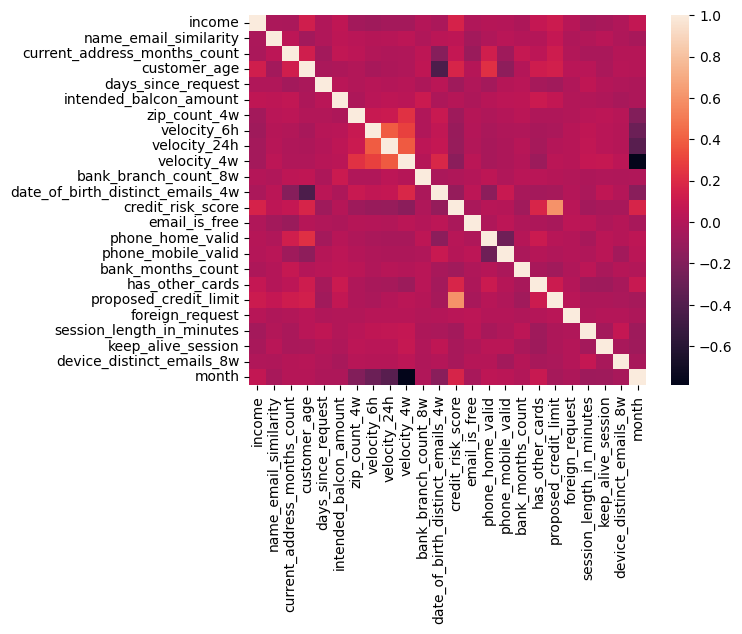

In [29]:
def corrFeatureFeaturePre(df):
    to_corr = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month']

    cor_mtx = df.filter(to_corr).corr()
    round(cor_mtx, 2)
    sns.heatmap(cor_mtx)
    plt.savefig(get_available_name('../plots', 'heatmap_corr_features', 'png'))
    return cor_mtx

corrFeatureFeaturePre(df_train)

# Data Pre Processing

## One Hot Encoding

In order to remove all categorical variables we choose to use OneHotEncoding

In [7]:
val = {'payment_type': OneHotEncoder(sparse_output=False, min_frequency=1), 
       'employment_status': OneHotEncoder(sparse_output=False, min_frequency=1), 
       'housing_status': OneHotEncoder(sparse_output=False, min_frequency=1), 
       'source': OneHotEncoder(sparse_output=False, min_frequency=1), 
       'device_os': OneHotEncoder(sparse_output=False, min_frequency=1)}

df_train_new = df_train.copy()

for i in val:
    ohe = val[i]
    ohe.fit(df_train_new[i].to_numpy().reshape(-1, 1))
    enc = ohe.transform(df_train_new[[i]])
    encoded_df = pd.DataFrame(enc, columns=[i + '_' + j for j in ohe.get_feature_names_out()])
    df_train_new = pd.concat([df_train_new.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    df_train_new.drop(axis=1, labels=i, inplace = True)

/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [54]:
df_train_new.to_csv('../datasets/train_after_pre.csv', index=False)

In [17]:
df_train_new = pd.read_csv('../datasets/train_after_pre.csv')

## Analysis after Pre Processing

### Correlation between Features and Target

Checking the newly added columns to see if anything pops up

In [31]:
c = df_train_new.drop("is_fraud", axis=1).apply(lambda x: x.corr(df_train_new.is_fraud))
c.to_csv(get_available_name('../correlations', 'feature_target', 'csv'))
c

income                              0.032108
name_email_similarity              -0.059078
current_address_months_count        0.035271
customer_age                        0.054938
days_since_request                 -0.008181
intended_balcon_amount             -0.008065
zip_count_4w                        0.019658
velocity_6h                        -0.017979
velocity_24h                       -0.026566
velocity_4w                         0.000587
bank_branch_count_8w               -0.008576
date_of_birth_distinct_emails_4w   -0.041903
credit_risk_score                   0.057252
email_is_free                       0.014882
phone_home_valid                   -0.025467
phone_mobile_valid                 -0.024722
bank_months_count                   0.021835
has_other_cards                    -0.041462
proposed_credit_limit               0.070214
foreign_request                     0.024326
session_length_in_minutes          -0.000594
keep_alive_session                 -0.041373
device_dis

### Correlation between Features

Visually inspecting the correlation plot

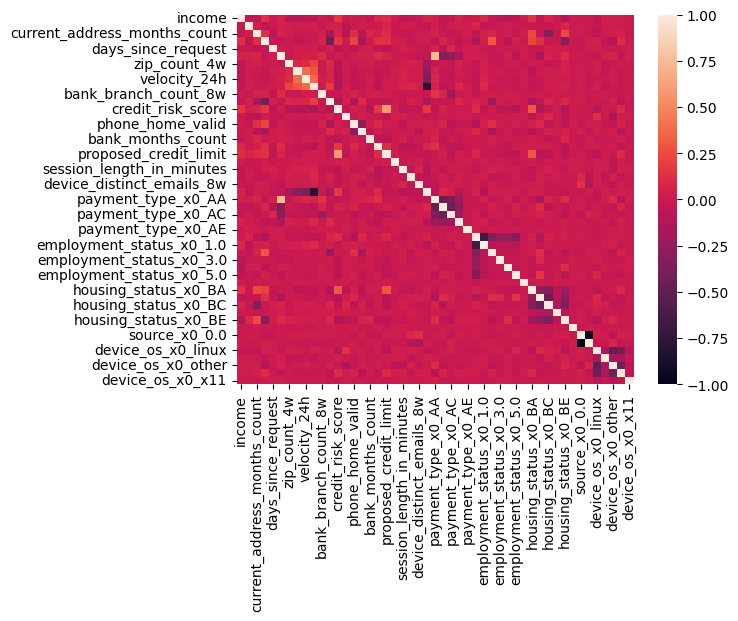

In [41]:
cor_f_f = df_train_new.drop(axis=1, labels='is_fraud').corr()
round(cor_f_f, 2)
sns.heatmap(cor_f_f)
plt.savefig(get_available_name('../plots', 'heatmap_corr_features_after_processing', 'png'))
cor_f_f.to_csv(get_available_name('../correlations', 'feature_feature', 'csv'))

## Split train data

For us to have more data to train our model we choose to KFold to split the data instead of the usual 70% 30%.

We had to take into consideration that this was an unbalanced data set so we needed to make sure that the splits translated correctly the data.

In [8]:
def splitInFolds(df):
    X_train = df.drop(labels='is_fraud', axis=1)
    y_train = df.is_fraud

    #skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=42)
    skf = RepeatedStratifiedKFold(random_state=42)

    train_folds = []
    validation_folds = []

    for train_index, test_index in skf.split(X_train, y_train):
        train_folds.append(train_index)
        validation_folds.append(test_index)
    return X_train, y_train, train_folds, validation_folds

X_train, y_train, train_folds, validation_folds = splitInFolds(df_train_new)

# Models

In [9]:
def save(model, ids, pred):
    pd.DataFrame({'id': ids, 'is_fraud': pred}).to_csv(get_available_name('../predictions', f'{model}_attempt', 'csv'), index=False)

## Test Dataset Preparation

When testing we need to submit the test dataset to the exact same pre-process that we made in the training phase

This implies:
- replacing -1 with NAN
- drop the same columns, we save the id column because we will need it later to save the predictions
- Impute values to replace NAN
- One Hot Encode categorical values

In [10]:
df_test_new = df_test.copy()
df_test_new = replaceMissingToNAN(df_test_new)

X_test_index = df_test_new['id']
df_test_new.drop(axis=1, labels='id', inplace=True)
df_test_new.drop(axis=1, labels='prev_address_months_count', inplace=True)
df_test_new.drop(axis=1, labels='device_fraud_count', inplace=True)
df_test_new.reset_index(inplace=True, drop=True)

df_test_new[categorical] = df_test_new[categorical].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    )
)

df_test_new[numerical] = imp_num.transform(df_test_new[numerical])
df_test_new[categorical] = imp_cat.transform(df_test_new[categorical])

for i in val:
    ohe = val[i]
    enc = ohe.transform(df_test_new[[i]])
    encoded_df = pd.DataFrame(enc, columns=[i + '_' + j for j in ohe.get_feature_names_out()])
    df_test_new = pd.concat([df_test_new.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    df_test_new.drop(axis=1, labels=i, inplace = True)

/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/home/andresilva/GitHub/DF/DF_Project/venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


## Decision Trees

### Grid Search

We decided to make a decision tree because this is a model that allows us to better understand the split points and decision it makes, also is visually easier to understand it when compared to others.

We runned this model only two times, the second one was after making the XGBoost model, and thus, we added the class weight to the positive class.

In [11]:
def dtGridSearch(X_train, y_train, train_folds, validation_folds):
    sum_w = np.unique(y_train, return_counts=True)
    sum_wpos = sum_w[1][1]
    sum_wneg = sum_w[1][0]
    param_grid = {
        "criterion":['gini', 'entropy'],
        "max_depth": range(3, 50, 1),
        "ccp_alpha": [0, 0.1, 0.01, 0.001]
    }

    scoring = {"Recall": "recall", "BACC": "balanced_accuracy", "ROC-AUC": "roc_auc"}

    dt = DecisionTreeClassifier(class_weight={0: 1, 1: 100*(sum_wneg/sum_wpos)}, random_state=42)

    grid_search = GridSearchCV(dt, param_grid, cv=zip(train_folds,validation_folds), scoring=scoring, refit="ROC-AUC", return_train_score=True, n_jobs=6, verbose=True)

    grid_search.fit(X_train, y_train)

    return grid_search

grid_cv_dt = dtGridSearch(X_train, y_train, train_folds, validation_folds)

Fitting 50 folds for each of 376 candidates, totalling 18800 fits


In [12]:
grid_cv_dt.best_score_

0.753615701032055

In [13]:
grid_cv_dt.best_params_

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 5}

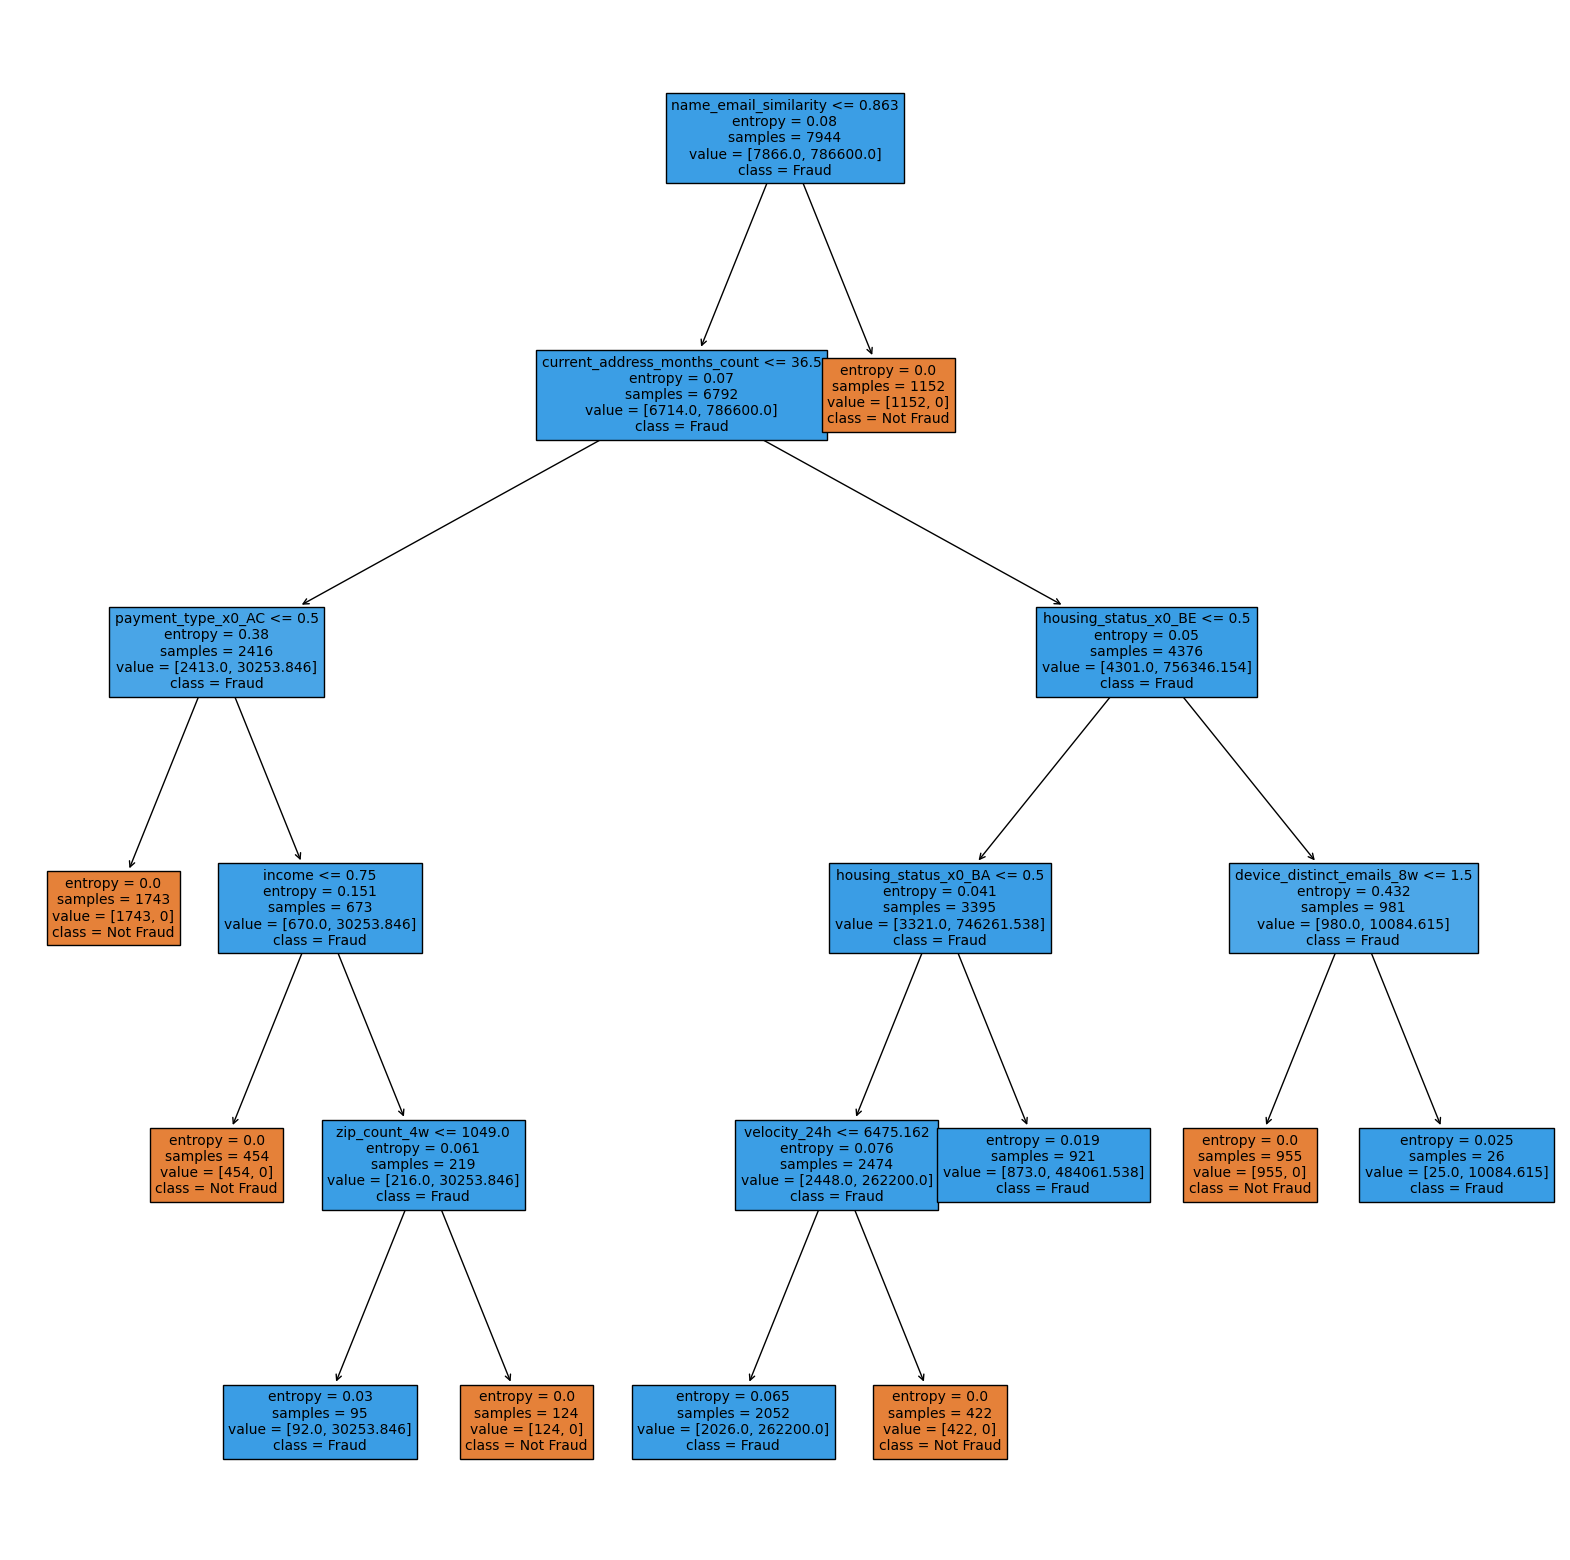

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(grid_cv_dt.best_estimator_, fontsize=10, feature_names=df_test_new.columns, class_names=['Not Fraud', 'Fraud'], filled=True);
plt.savefig(get_available_name('../model/decisiontree', 'model_dt_grid_tree', 'png'))

### Testing

In [17]:
X_test = df_test_new

pred_y_dt = grid_cv_dt.predict_proba(X_test)
save('dt_grid', X_test_index, map(lambda x: round(x[1], 2), pred_y_dt.tolist()))
pred_y_dt

array([[1.        , 0.        ],
       [0.00766768, 0.99233232],
       [1.        , 0.        ],
       ...,
       [0.00180024, 0.99819976],
       [0.00766768, 0.99233232],
       [0.00180024, 0.99819976]])

## Random Forest

This technique is super-seeded by Boosting techniques, such as AdaBoost and Gradient Boosting (XGBoost).

## AdaBoost

We did not use AdaBoost, this decision was based on [Study of AdaBoost and Gradient Boosting Algorithms for Predictive Analytics](https://link.springer.com/chapter/10.1007/978-981-15-0633-8_22) and [Boosting for high-dimensional two-class prediction](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-015-0723-9).

## XGBoost

### Training

The grid is not populated because this was made in 8 iterations changing values and evaluating the results. 
All of the progress can be seen in the model folders.

At one point we start to get better results in our model; However, the score on Kaggle was reducing so we deduce that we were overfitting the data and back off the best previous results.

In [35]:
def xgboostGridSearch(X_train, y_train, train_folds, validation_folds):
    sum_w = np.unique(y_train, return_counts=True)
    sum_wpos = sum_w[1][1]
    sum_wneg = sum_w[1][0]
    param_grid = {
        "max_depth": [2], # 1 2 3
        "eta": [0.05], # 0-04 0.05 0.06
        "gamma": [0], # 0 0.005 0.01
        "lambda": [5], # 4 5 6
        "scale_pos_weight": [(sum_wneg)/(sum_wpos)], # 0 (sum_wneg)/(sum_wpos) (2*sum_wneg)/(sum_wpos) (sum_wneg)/(2*sum_wpos)
        "min_child_weight": [0.6], # 0.5 0.6 0.7
        "n_estimators": [150] # 50 100 150 200
    }

    scoring = {"Recall": "recall", "BACC": "balanced_accuracy", "ROC-AUC": "roc_auc"}

    param_base = {'objective': 'reg:logistic', 'nthread': 6, 'eval_metric': 'auc'}

    xgb_cl = XGBClassifier(**param_base, seed=42)
    grid_cv = GridSearchCV(xgb_cl, param_grid, cv=zip(train_folds,validation_folds), scoring=scoring, refit="ROC-AUC", return_train_score=True, verbose=True)
    grid_cv.fit(X_train, y_train)
    return grid_cv

grid_cv = xgboostGridSearch(X_train, y_train, train_folds, validation_folds)

Fitting 50 folds for each of 1 candidates, totalling 50 fits


### Model Information and paramenters

In [36]:
grid_cv.best_score_ # 0.8625821722076776

0.8625821722076776

In [37]:
grid_cv.best_params_ # {'eta': 0.05, 'gamma': 0, 'lambda': 5, 'max_depth': 2, 'min_child_weight': 0.6, 'n_estimators': 150, 'scale_pos_weight': 100.84615384615384 }

{'eta': 0.05,
 'gamma': 0,
 'lambda': 5,
 'max_depth': 2,
 'min_child_weight': 0.6,
 'n_estimators': 150,
 'scale_pos_weight': 100.84615384615384}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

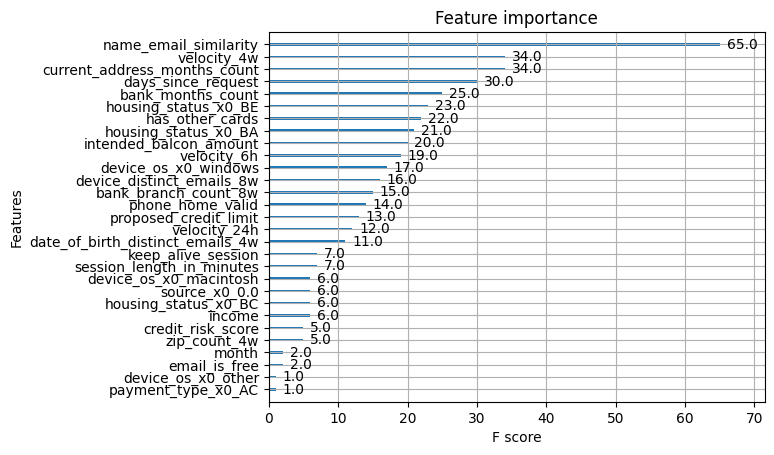

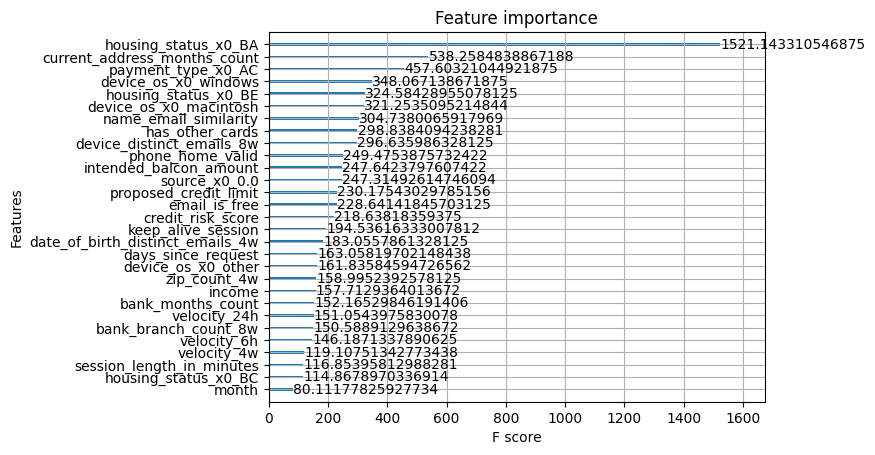

In [38]:
grid_cv.best_estimator_.get_booster().feature_names = X_train.columns.tolist()
xgb.plot_importance(grid_cv.best_estimator_, importance_type="weight")
xgb.plot_importance(grid_cv.best_estimator_, importance_type="gain")

### Testing

After testing to avoid losing data the predictions are automatically saved

In [40]:
X_test = df_test_new

pred_y = grid_cv.predict_proba(X_test)
save('xgboost_grid', X_test_index, map(lambda x: round(x[1], 2), pred_y.tolist()))
pred_y

array([[0.91639   , 0.08361001],
       [0.94570667, 0.05429332],
       [0.93156886, 0.06843116],
       ...,
       [0.30064547, 0.6993545 ],
       [0.8032405 , 0.19675954],
       [0.16159505, 0.83840495]], dtype=float32)